## Telecom Churn - Indian & South East Asian Market - Case Study

**Rahul Raj PR & Shivangi Mishra**

https://www.linkedin.com/in/rahul1100100

https://www.linkedin.com/in/shivangi-mishra-77931417a

***Note :*** The Notebook take a little more time than normal to run completely beacuse of the use GridSearch-Cross Validation at multiple instances

**Problem Statement**

 In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

**Understanding & Defining Churn**

There are two main models of payment in the telecom industry - Postpaid (customers pay a monthly/annual bill after using the services) and Prepaid (customers pay/recharge with a certain amount in advance and then use the services).
In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and we directly know that this is an instance of churn.
However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).
Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully. Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.This project is based on the Indian and Southeast Asian market. 

**Definitions of Churn :**
    
There are various ways to define churn, such as:

**1.Revenue-based churn:**

Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

**2.Usage-based churn:**

Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the usage-based definition to define churn. 

**Understanding the Business Objective & Data :**

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

**The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.** To do this task well, understanding the typical customer behaviour during churn will be helpful. 

**Understanding Customer Behavior during Churn :**

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1.The `good` phase: In this phase, the customer is happy with the service and behaves as usual.

2.The `action` phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3.The `churn` phase: In this phase, the customer is said to have churned. We define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to us for prediction. Thus, after tagging churn as 1/0 based on this phase, we discard all data corresponding to this phase.

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase. 

### Import the basic libraries and basic settings

In [1695]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1696]:
import warnings
warnings.filterwarnings('ignore')

In [1697]:
plt.style.use('ggplot') # Setting ggplot as the deafult ploting style

### Reading the data and some basic checks

In [1698]:
path = 'telecom_churn_data.csv'
tel = pd.read_csv(path) # Reading and displaying the dataset
tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [1699]:
ini_len = len(tel) # Original length of the dataframe is assigned to a variable
tel.shape

(99999, 226)

In [1700]:
tel.drop_duplicates() # Dropping the any duplicated rows in the dataframe if any
tel.shape

(99999, 226)

**Inference:**
    
    - Looks like no duplicate is present in the dataframe

In [1701]:
# Checking for duplicated entries in the module number column which is the unique identifier in the dataset

tel['mobile_number'].duplicated().sum() 

0

In [1702]:
tel.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [1703]:
# rename some of the columns in to 6,7,8,9 month format

tel.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                          'jul_vbc_3g':'vbc_3g_7',
                          'aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

### Missing Values & Treatment

In [1704]:
tel.isnull().sum().sum()

3594931

**Inference :**

There are a lot of null values in the data frame

**User Defined function to display the null values summary**

In [1705]:
def null_summary(df):
    
    a = df.dtypes.rename('data type')
    b = df.isnull().sum().rename('null count') # count nulls
    c = round((df.isnull().mean()*100),1).rename('null perc') # percentage nulls
    
    tab = pd.concat([a,b,c],axis = 1) # null data frame 
    tab.index.name = 'column name'
    
    tab = tab[tab['null count'] > 0] # filtering the columns containing the null values
    
    tab.sort_values(by = ['null count','column name'], ascending = [False,True], inplace = True)
    tab.reset_index(inplace = True) # sort and and indexing
    
    return tab # returning the null table to the memory

**User Defined function to display distribution of null values**

In [1706]:
def dist_plot(df,col):
    print('\n')
    plt.figure(figsize = [8,2]) # ploting the histogram on the percentage of null values in columns
    plt.title('\nnull value distribution\n')
    series = df[col]
    plt.hist(series, bins = 20)
    plt.xlabel('\nnull value percentage\n')
    plt.show()

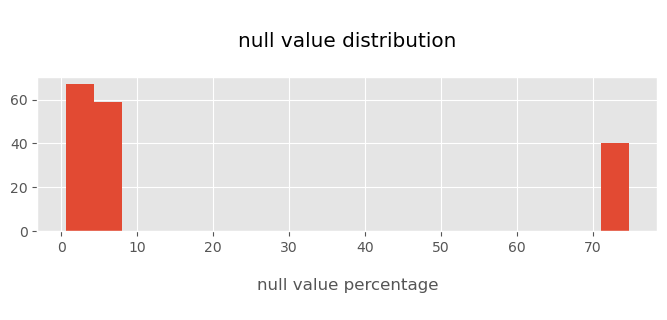

,column name,data type,null count,null perc
0,arpu_2g_6,float64,74846,74.8
1,arpu_3g_6,float64,74846,74.8
2,av_rech_amt_data_6,float64,74846,74.8
3,count_rech_2g_6,float64,74846,74.8
4,count_rech_3g_6,float64,74846,74.8


In [1707]:
nu = null_summary(df = tel) # dsiplaying missing value column summary 
dist_plot(nu,'null perc') # plotting the missing value distribution
nu.head()

In [1708]:
nu['data type'].value_counts()

float64    155
object      11
Name: data type, dtype: int64

#### Inference :

Clearly there are two segmanet in missing value percentages

1. Columns with greater than 70% null values
2. Columns with less than 10% null values
3. There are 11 object columns and remaning are numerical columns
4. Usually columns with 70 % null values are being dropped from the dataframe.**in this case null values carries some meaning.**
5. **Hence we are not droping them. we will fill the mussing values with appropriate values**

**1.Imputing the numerical null values**

**Strategy:** All the numeric columsn can be filled with zero based looking at the nature of the columns

In [1709]:
nu_numeric = nu[nu['data type'] != 'object']['column name'] # selecting the numrical columns with missing values
nu_numeric

0               arpu_2g_6
1               arpu_3g_6
2      av_rech_amt_data_6
3         count_rech_2g_6
4         count_rech_3g_6
              ...        
155      std_og_t2m_mou_7
156      std_og_t2t_mou_7
162        loc_ic_t2o_mou
163        loc_og_t2o_mou
164        std_og_t2o_mou
Name: column name, Length: 155, dtype: object

In [1710]:
for var in nu_numeric:
    tel[var] = tel[var].fillna(0) # imputing the null  values with zero

**2.Imputing the date null values**

**Strategy:** All the date columsn can be filled with oldest date in the respective columns

In [1711]:
nu_dates = tel.columns[[x.upper().find('DATE') >=0 for x in tel.columns]] # Selecting the date columns

In [1712]:
for var in nu_dates:
    
    tel[var] = pd.to_datetime(tel[var], dayfirst=True)
    ini_date = tel[var].min() # getting the oldest date in the column
    tel[var] = tel[var].fillna(ini_date) #imputing the null values with old date in the colums

In [1713]:
null_summary(tel) # rechecking the null values status in the dataframe

,column name,data type,null count,null perc


**Inference :** 
    
    All the null columns have been dealt accordingly

In [1714]:
tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,...,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,34.047,...,0,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,167.690,...,0,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,221.338,...,0,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,261.636,...,0,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00


### Type Casting of the Binary columns

In [1715]:
binary_cols = tel.columns[tel.nunique() == 2] # selecting the binary column names with value-counts == 2

In [1716]:
tel[binary_cols].dtypes # lets look at the datatypes of the binary columns in the dataframe

night_pck_user_6    float64
night_pck_user_7    float64
night_pck_user_8    float64
night_pck_user_9    float64
fb_user_6           float64
fb_user_7           float64
fb_user_8           float64
fb_user_9           float64
dtype: object

**Strategy :** Lets convert all the float binaries to int binaries

In [1717]:
for var in binary_cols:
    tel[var] = tel[var].astype(np.int) # converting the float binaries to int binaries

In [1718]:
tel[binary_cols].dtypes # Lets reconfirm the conversion

night_pck_user_6    int64
night_pck_user_7    int64
night_pck_user_8    int64
night_pck_user_9    int64
fb_user_6           int64
fb_user_7           int64
fb_user_8           int64
fb_user_9           int64
dtype: object

### Arriving new Features in the Dataframe

1. `Total Data Recharge Amount`
2. `Total Service Packs`
3. `Incoming - Outgoing Diffrence`
4. `3g - 2g volume Difference`
5. `Diffrence of each items in good and active phases`

In [1719]:
months = [6,7,8] # list of the months on which new features are to be created

**1.Total Data Recharge Amount Column**

In [1720]:
for month in months :
    
    col_rech_data = 'total_rech_data_'+str(month) # getting the exitsing column name of the month of iteraion
    col_rech_data = 'av_rech_amt_data_'+str(month) # getting the exitsing column name of the month of iteraion
    
    # creating list of existing column names for the month required for new feature
    sel_cols = [col_rech_data,col_rech_data] 
    
    # arriving the column name for the new feature month of iteration
    arrive_col_name = 'total_data_rech_amt_'+str(month) 
    
    # arriving the values for the new feature for the month of iteration
    tel[arrive_col_name] = tel[sel_cols].sum(axis = 1) 
    
    # droping the exiting column of the month which the new feature is arrived from
    tel.drop(sel_cols,axis = 1,inplace = True)

**2.Total Service Pack column**

In [1721]:
for month in months :
    
    col_2g = 'monthly_2g_'+str(month) # getting the exitsing column name of the month of iteraion
    col_3g = 'monthly_3g_'+str(month) # getting the exitsing column name of the month of iteraion
    col_2g_sachet = 'sachet_2g_'+str(month) # getting the exitsing column name of the month of iteraion
    col_3g_sachet = 'sachet_3g_'+str(month) # getting the exitsing column name of the month of iteraion
    
    # creating list of existing column names for the month required for new feature
    sel_cols = [col_2g,col_3g,col_2g_sachet,col_3g_sachet]
    
    # arriving the column name for the new feature month of iteration
    arrive_col_name = 'total_service_packs_'+str(month)
    tel[arrive_col_name] = tel[sel_cols].sum(axis = 1)
    
    # droping the exiting column of the month which the new feature is arrived from
    tel.drop(sel_cols,axis = 1,inplace = True)

**3.Column - difference of incoming to outgoing**

In [1722]:
for month in months :
    
    col_ic = 'total_ic_mou_'+str(month) # getting the exitsing column name of the month of iteraion
    col_og = 'total_og_mou_'+str(month) # getting the exitsing column name of the month of iteraion
    
    # creating list of existing column names for the month required for new feature
    sel_cols = [col_ic,col_og]
    
    # arriving the column name for the new feature month of iteration
    arrive_col_name = 'diff_ic_og_'+str(month)
    tel[arrive_col_name] = tel[col_ic] - tel[col_og]
    
    # droping the exiting column of the month which the new feature is arrived from
    tel.drop(sel_cols,axis = 1,inplace = True)

**4.Column - difference of 3g data to 2g data**

In [1723]:
for month in months :
    
    col_3g = 'vol_3g_mb_'+str(month) # getting the exitsing column name of the month of iteraion
    col_2g = 'vol_2g_mb_'+str(month) # getting the exitsing column name of the month of iteraion
    
    # creating list of existing column names for the month required for new feature
    sel_cols = [col_3g,col_2g]
    
    # arriving the column name for the new feature month of iteration
    arrive_col_name = 'diff_vol_3g_2g_'+str(month)
    tel[arrive_col_name] = tel[col_3g] - tel[col_2g]
    
    # droping the exiting column of the month which the new feature is arrived from
    tel.drop(sel_cols,axis = 1,inplace = True)

**5.Columns - Good phases to the active phases**

In [1724]:
tel['diff_total_service_packs_good_active_phase']=tel['total_service_packs_6']+tel['total_service_packs_7']-tel['total_service_packs_8']
tel['diff_ic_og_good_active_phase']=tel['diff_ic_og_6']+tel['diff_ic_og_7']-tel['diff_ic_og_8']
tel['diff_3g_2g_good_active_phase']=tel['diff_vol_3g_2g_6']+tel['diff_vol_3g_2g_7']-tel['diff_vol_3g_2g_8']
tel['diff_total_rech_amt_good_active']= tel['total_rech_amt_6']+tel['total_rech_amt_7']-tel['total_rech_amt_8']

### Arriving at the high value customers

**Defining High Value Customer** : Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [1725]:
# Listing the columns which are in the good phases

rech_cols_good_phase = ['total_rech_amt_6','total_rech_amt_7','total_data_rech_amt_6','total_data_rech_amt_7']

In [1726]:
# Calculating the average recharge amount in the good phase

tel['avg_rech_amt_good_phase'] = tel[rech_cols_good_phase].sum(axis = 1)/2

In [1727]:
# Arriving at the 70th percentile of the avg reach amt
critical_value = np.percentile(tel['avg_rech_amt_good_phase'],70) 
critical_value

487.0

In [1728]:
tel_hv = tel[tel['avg_rech_amt_good_phase'] >= critical_value] # filtering the dataframe to the highvalue customer

In [1729]:
tel_hv.reset_index(drop=True,inplace=True)

In [1730]:
tel_hv.shape

(30034, 216)

In [1731]:
round((len(tel_hv)/ini_len)*100,2) # calculating the percentage of high value customers in the entire datafarme

30.03

**Inference :**
    
    - There is about 30% of the records are belongs to high values customers

### Churn Labeling

In [1732]:
# List of the columns which decides whether existing are churn or not churn

decide_cols = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [1733]:
# Arriving the churn column in the dataframe , churn = 1, non-churn = 0

tel_hv['churn'] = tel_hv[decide_cols].sum(axis = 1).apply(lambda x : 1 if x == 0 else 0)

**User Defined function for Dispaying the distribution of column values**

In [1734]:
def simple_stat(df,var):
    cnt = df[var].value_counts().rename('count')
    dist = round(df[var].value_counts(normalize = True)*100,2).rename('distribution')
    stat = pd.concat([cnt,dist], axis = 1)
    stat.index.name = 'value'
    stat.reset_index(inplace =True)
    return stat

In [1735]:
simple_stat(tel_hv,'churn')

,value,count,distribution
0,0,27636,92.02
1,1,2398,7.98


**Inference :**
    
    - There is ~ 8% high values customers are churning in the existing dataframe
    - The distribution is highly imbalanced , Appropriate the sampling methods needs to apply

### Removing the unessessary Columns

1. Drop the circle id column
2. Drop all columns of Sep (9th Month)
3. Drop all columns with zero variance
4. Drop all columns with same non-numerical value
5. Drop individual columns whose totals are available as a different attribute

**1.Drop the circle id column**

In [1736]:
tel_hv.drop('circle_id', axis =1,inplace = True)

**2.Drop all columns of sep month (9th Month)**

In [1737]:
sep_cols = tel_hv.columns[[ x.find('_9')>=0 for x in tel_hv.columns ]] # selecting all the columns pertaining to sep

In [1738]:
tel_hv.drop(sep_cols,axis =1, inplace = True) # dropping all the columns of sep

**3.Drop all columsn with zero variance**

In [1739]:
num_cols = tel_hv.select_dtypes(include=np.number).columns # selecting the numerical columns

In [1740]:
tel_hv[num_cols].var() # lest look at the variance of each of the columns

mobile_number                      4.723681e+11
loc_og_t2o_mou                     0.000000e+00
std_og_t2o_mou                     0.000000e+00
loc_ic_t2o_mou                     0.000000e+00
arpu_6                             2.106592e+05
                                       ...     
diff_ic_og_good_active_phase       9.163023e+05
diff_3g_2g_good_active_phase       1.657451e+06
diff_total_rech_amt_good_active    5.070556e+05
avg_rech_amt_good_phase            4.042372e+05
churn                              7.347041e-02
Length: 152, dtype: float64

In [1741]:
cols_with_zero_variance = num_cols[tel_hv[num_cols].var() == 0] # selecting the columns with zero variance

In [1742]:
tel_hv.drop(cols_with_zero_variance, axis = 1, inplace = True) # dropping the columns with zero variance

**4.Drop all columns with same non-numerical value**

In [1743]:
non_numeric_cols = tel_hv.select_dtypes(exclude= np.number).columns # selecting all the non numerical columns

In [1744]:
# selecting all the columns with single value in it.

non_numeric_cols_with_zero_variance = non_numeric_cols[tel_hv[non_numeric_cols].nunique() == 1]
non_numeric_cols_with_zero_variance

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], dtype='object')

In [1745]:
# dropping all the non-numerical columns with same value

tel_hv.drop(non_numeric_cols_with_zero_variance, axis = 1, inplace = True)

**5.Drop individual columns whose totals are available as a different attribute**

In [1746]:
# list of all the columns whose totals are available in other columns

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'mobile_number']

tel_hv.drop(individual_cols, axis = 1, inplace = True) # dropping all the above mentioned columns

### Exploratory Data Analysis

    1.Visualise the balance on the balance of the Target Variable
    2.Visualise the categorical variable
    3.Visualise the numerical varibales

**1.Visualise the balance on the balance of the Target Variable**

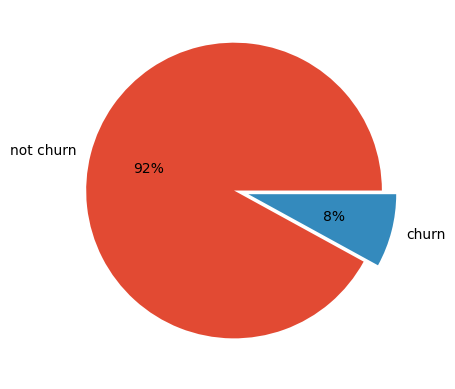

In [1747]:
s = tel_hv['churn'].value_counts()
plt.pie(s, autopct='%.0f%%', labels = ['not churn','churn'], explode = [0.1,0])
plt.show()

**inference :**
    
    - Near to 8% of the high value customers are churn in the current scenario

**1.Visualise the categorical variable**

In [1748]:
cat_cols = tel_hv.select_dtypes(include = 'object').columns # selecting the object columns if any
binary_cols = tel_hv.columns[tel_hv.nunique() == 2] # selecting the binary columns

In [1749]:
# all categorical columns = object columns + binary columns

all_cat_cols = list(cat_cols) + list(binary_cols)

all_cat_cols.remove('churn') # removing the churn column from all categorical columns
all_cat_cols 

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

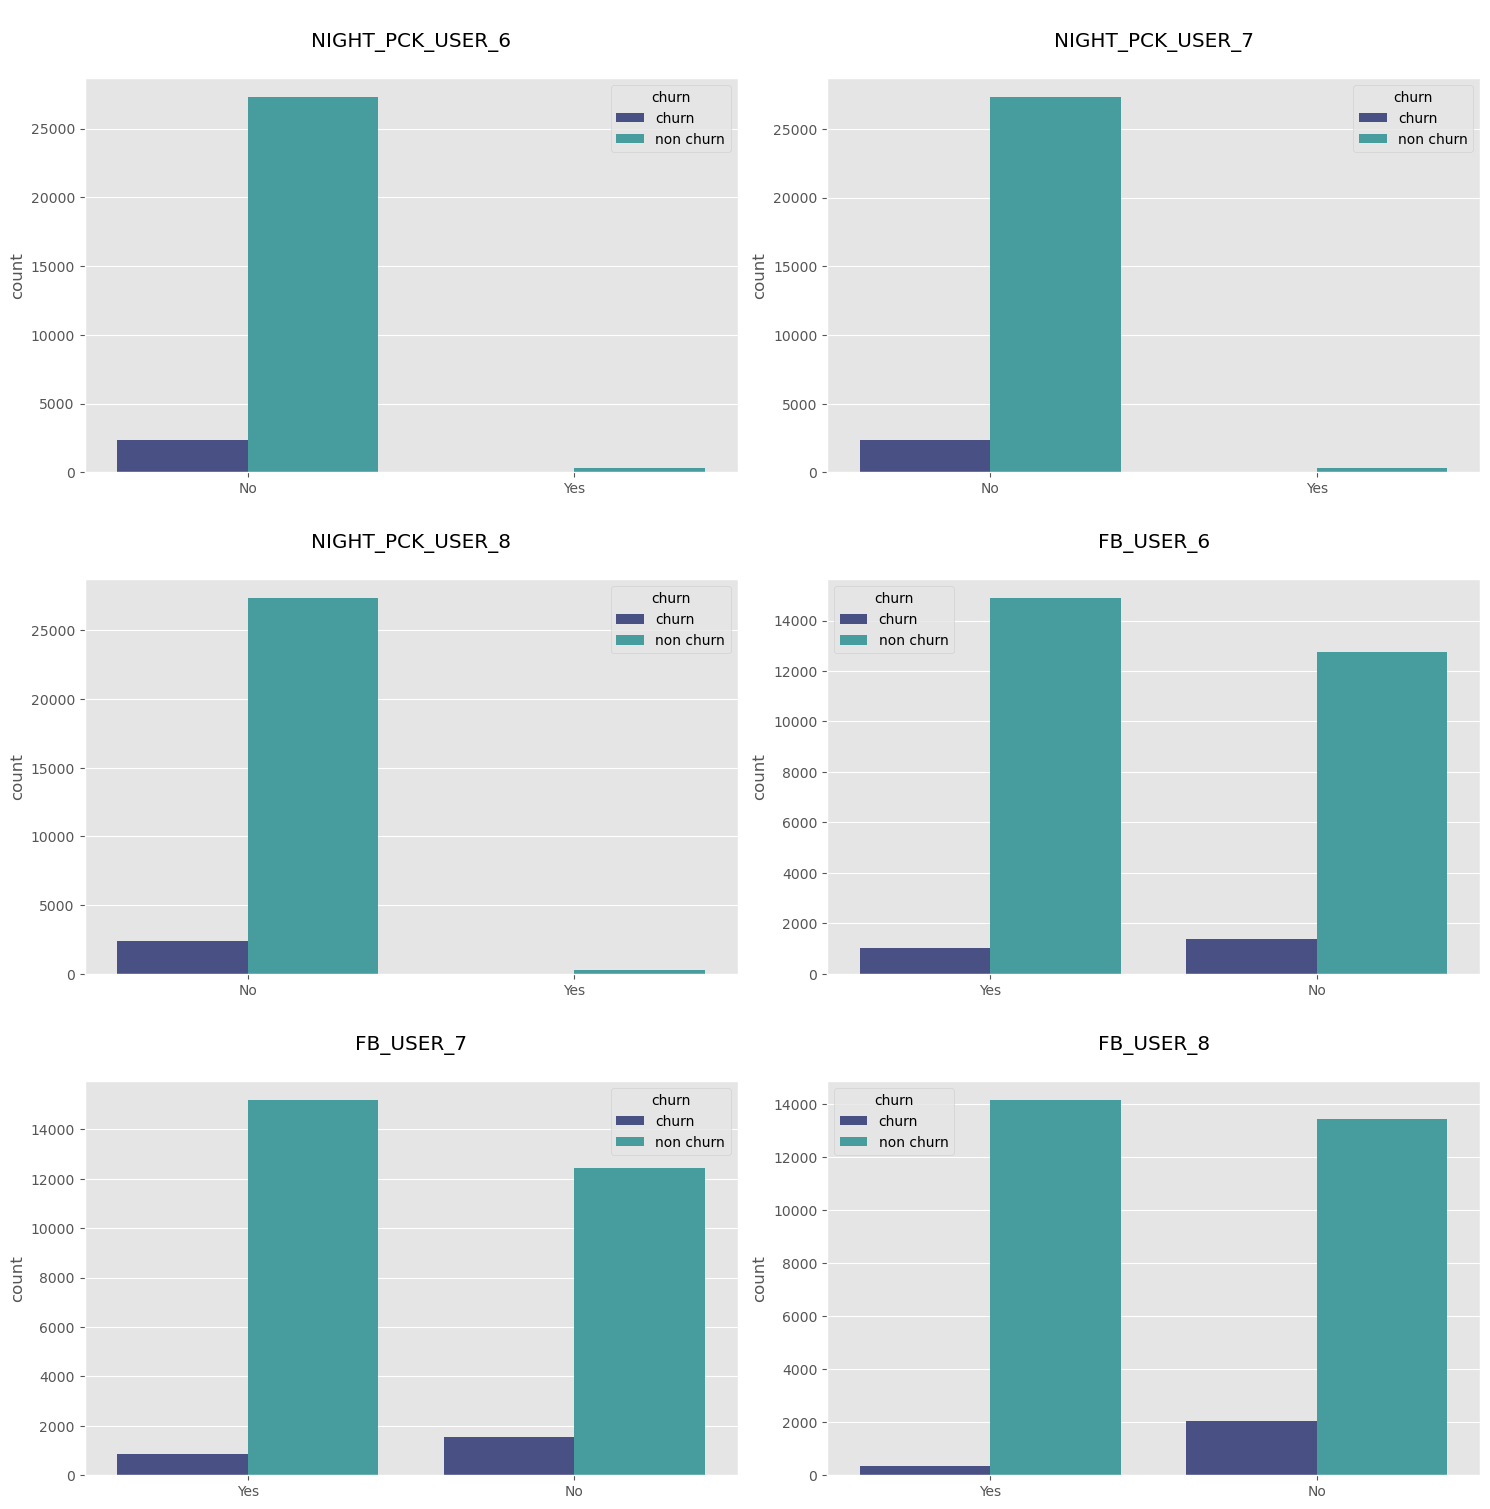

In [1750]:
n_cols = 2
n_rows = round(len(all_cat_cols)+1/n_cols)

plt.figure(figsize = [15,30])
for ind,var in enumerate(all_cat_cols):
    pos = ind+1 
    plt.subplot(n_rows,n_cols,pos)
    series = tel_hv[var].apply(lambda x: 'Yes' if x == 1 else 'No')
    hue = tel_hv['churn'].apply(lambda x: 'churn' if x == 1 else 'non churn')
    plt.title('\n'+str(var).upper()+'\n')
    sns.countplot(series, hue = hue,palette='mako')
    plt.xlabel("")
plt.tight_layout()

**Inference :**

    - The nigh pack users are few in numbers and they are not churning
    - The facebook usage does not show much of impact on the churning of customers 

**3.Visualise the numerical varibales**

In [1751]:
binary_cols = tel_hv.columns[tel_hv.nunique() == 2] # selectig the binary columns

# selecting the numerical columns excluding the binary columns

num_cols = tel_hv.drop(binary_cols, axis = 1).select_dtypes(include = np.number).columns 

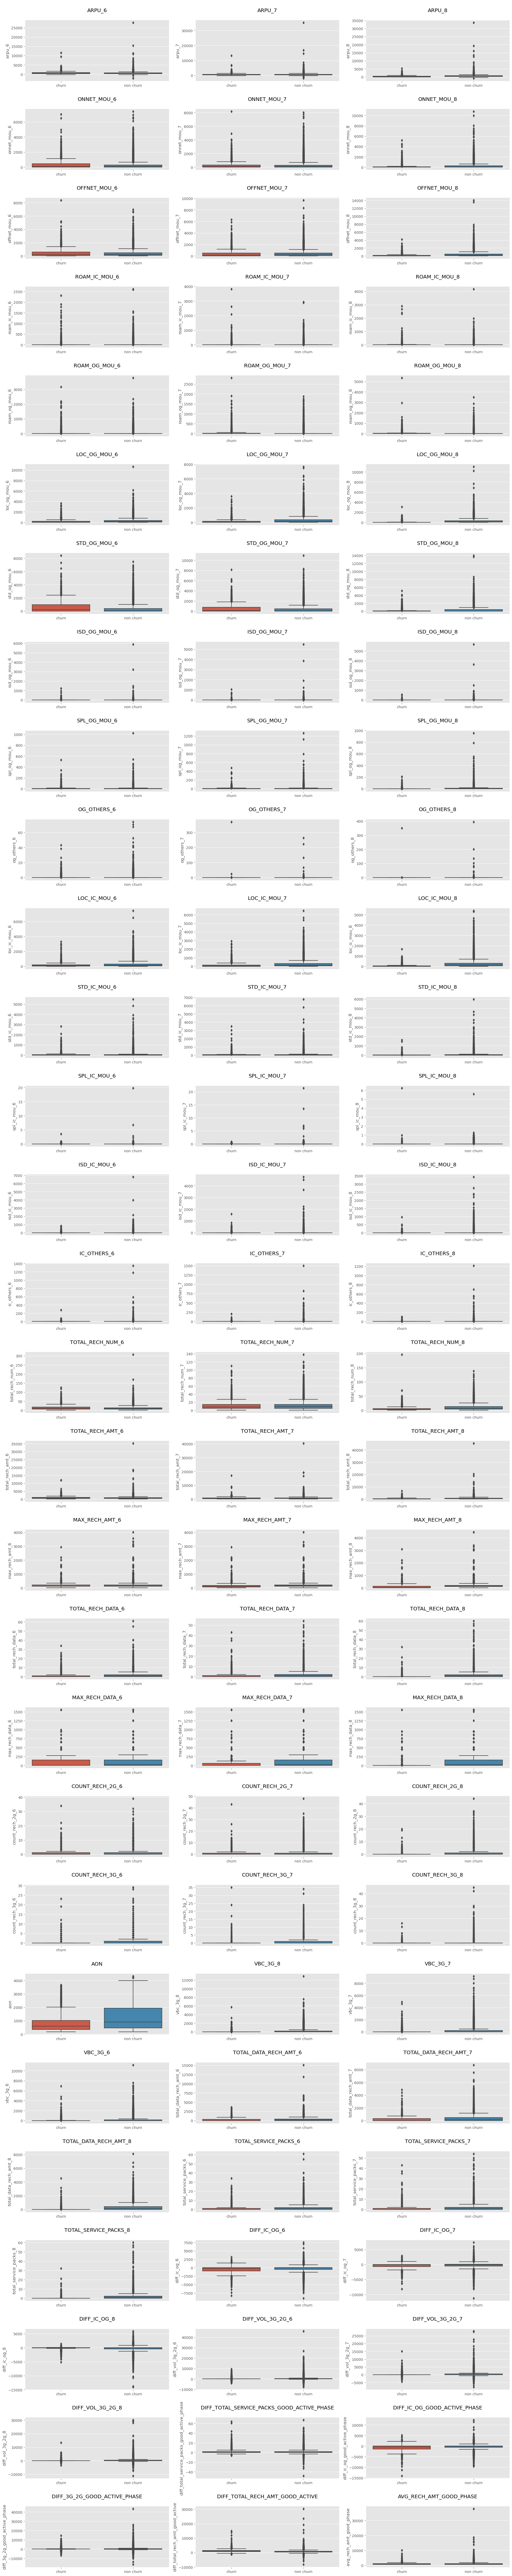

In [1752]:
# ploting the numerical columsn in the boxplot

n_cols = 3
n_rows = round(len(num_cols)+1/n_cols)

plt.figure(figsize = [20,300])
for ind,var in enumerate(num_cols):
    pos = ind+1 
    plt.subplot(n_rows,n_cols,pos)
    plt.title('\n'+str(var).upper()+'\n')
    x_var = tel_hv['churn'].apply(lambda x: 'churn' if x == 1 else 'non churn')
    sns.boxplot(y = tel_hv[var], x = x_var)
    plt.xlabel('')
plt.tight_layout()

### Checking for correlations

In [1753]:
corrmatrix = tel_hv.corr() # create the correlation matrix in the dataframe
corrmatrix.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,diff_ic_og_8,diff_vol_3g_2g_6,diff_vol_3g_2g_7,diff_vol_3g_2g_8,diff_total_service_packs_good_active_phase,diff_ic_og_good_active_phase,diff_3g_2g_good_active_phase,diff_total_rech_amt_good_active,avg_rech_amt_good_phase,churn
arpu_6,1.000000,0.670123,0.609625,0.342225,0.216385,0.186575,0.509378,0.339419,0.284745,0.129161,...,-0.220782,0.151767,0.086284,0.090714,-0.081957,-0.358167,0.113731,0.756771,0.730485,0.072381
arpu_7,0.670123,1.000000,0.757170,0.212237,0.320633,0.270132,0.353262,0.489981,0.395513,0.093954,...,-0.326726,0.083983,0.155261,0.113864,-0.081679,-0.286827,0.097124,0.656704,0.751333,-0.006701
arpu_8,0.609625,0.757170,1.000000,0.151110,0.232592,0.346444,0.278615,0.375325,0.524029,0.088570,...,-0.419859,0.086710,0.105249,0.171236,-0.143245,-0.055423,0.016983,0.274089,0.623784,-0.157656
onnet_mou_6,0.342225,0.212237,0.151110,1.000000,0.751893,0.621123,0.093717,0.042455,0.039568,0.025693,...,-0.407588,-0.068661,-0.074807,-0.071939,-0.124769,-0.574887,-0.055418,0.301441,0.115141,0.072427
onnet_mou_7,0.216385,0.320633,0.232592,0.751893,1.000000,0.806456,0.058279,0.087485,0.079515,0.038393,...,-0.541872,-0.069113,-0.072888,-0.070182,-0.129894,-0.497892,-0.055629,0.232218,0.113410,0.018125


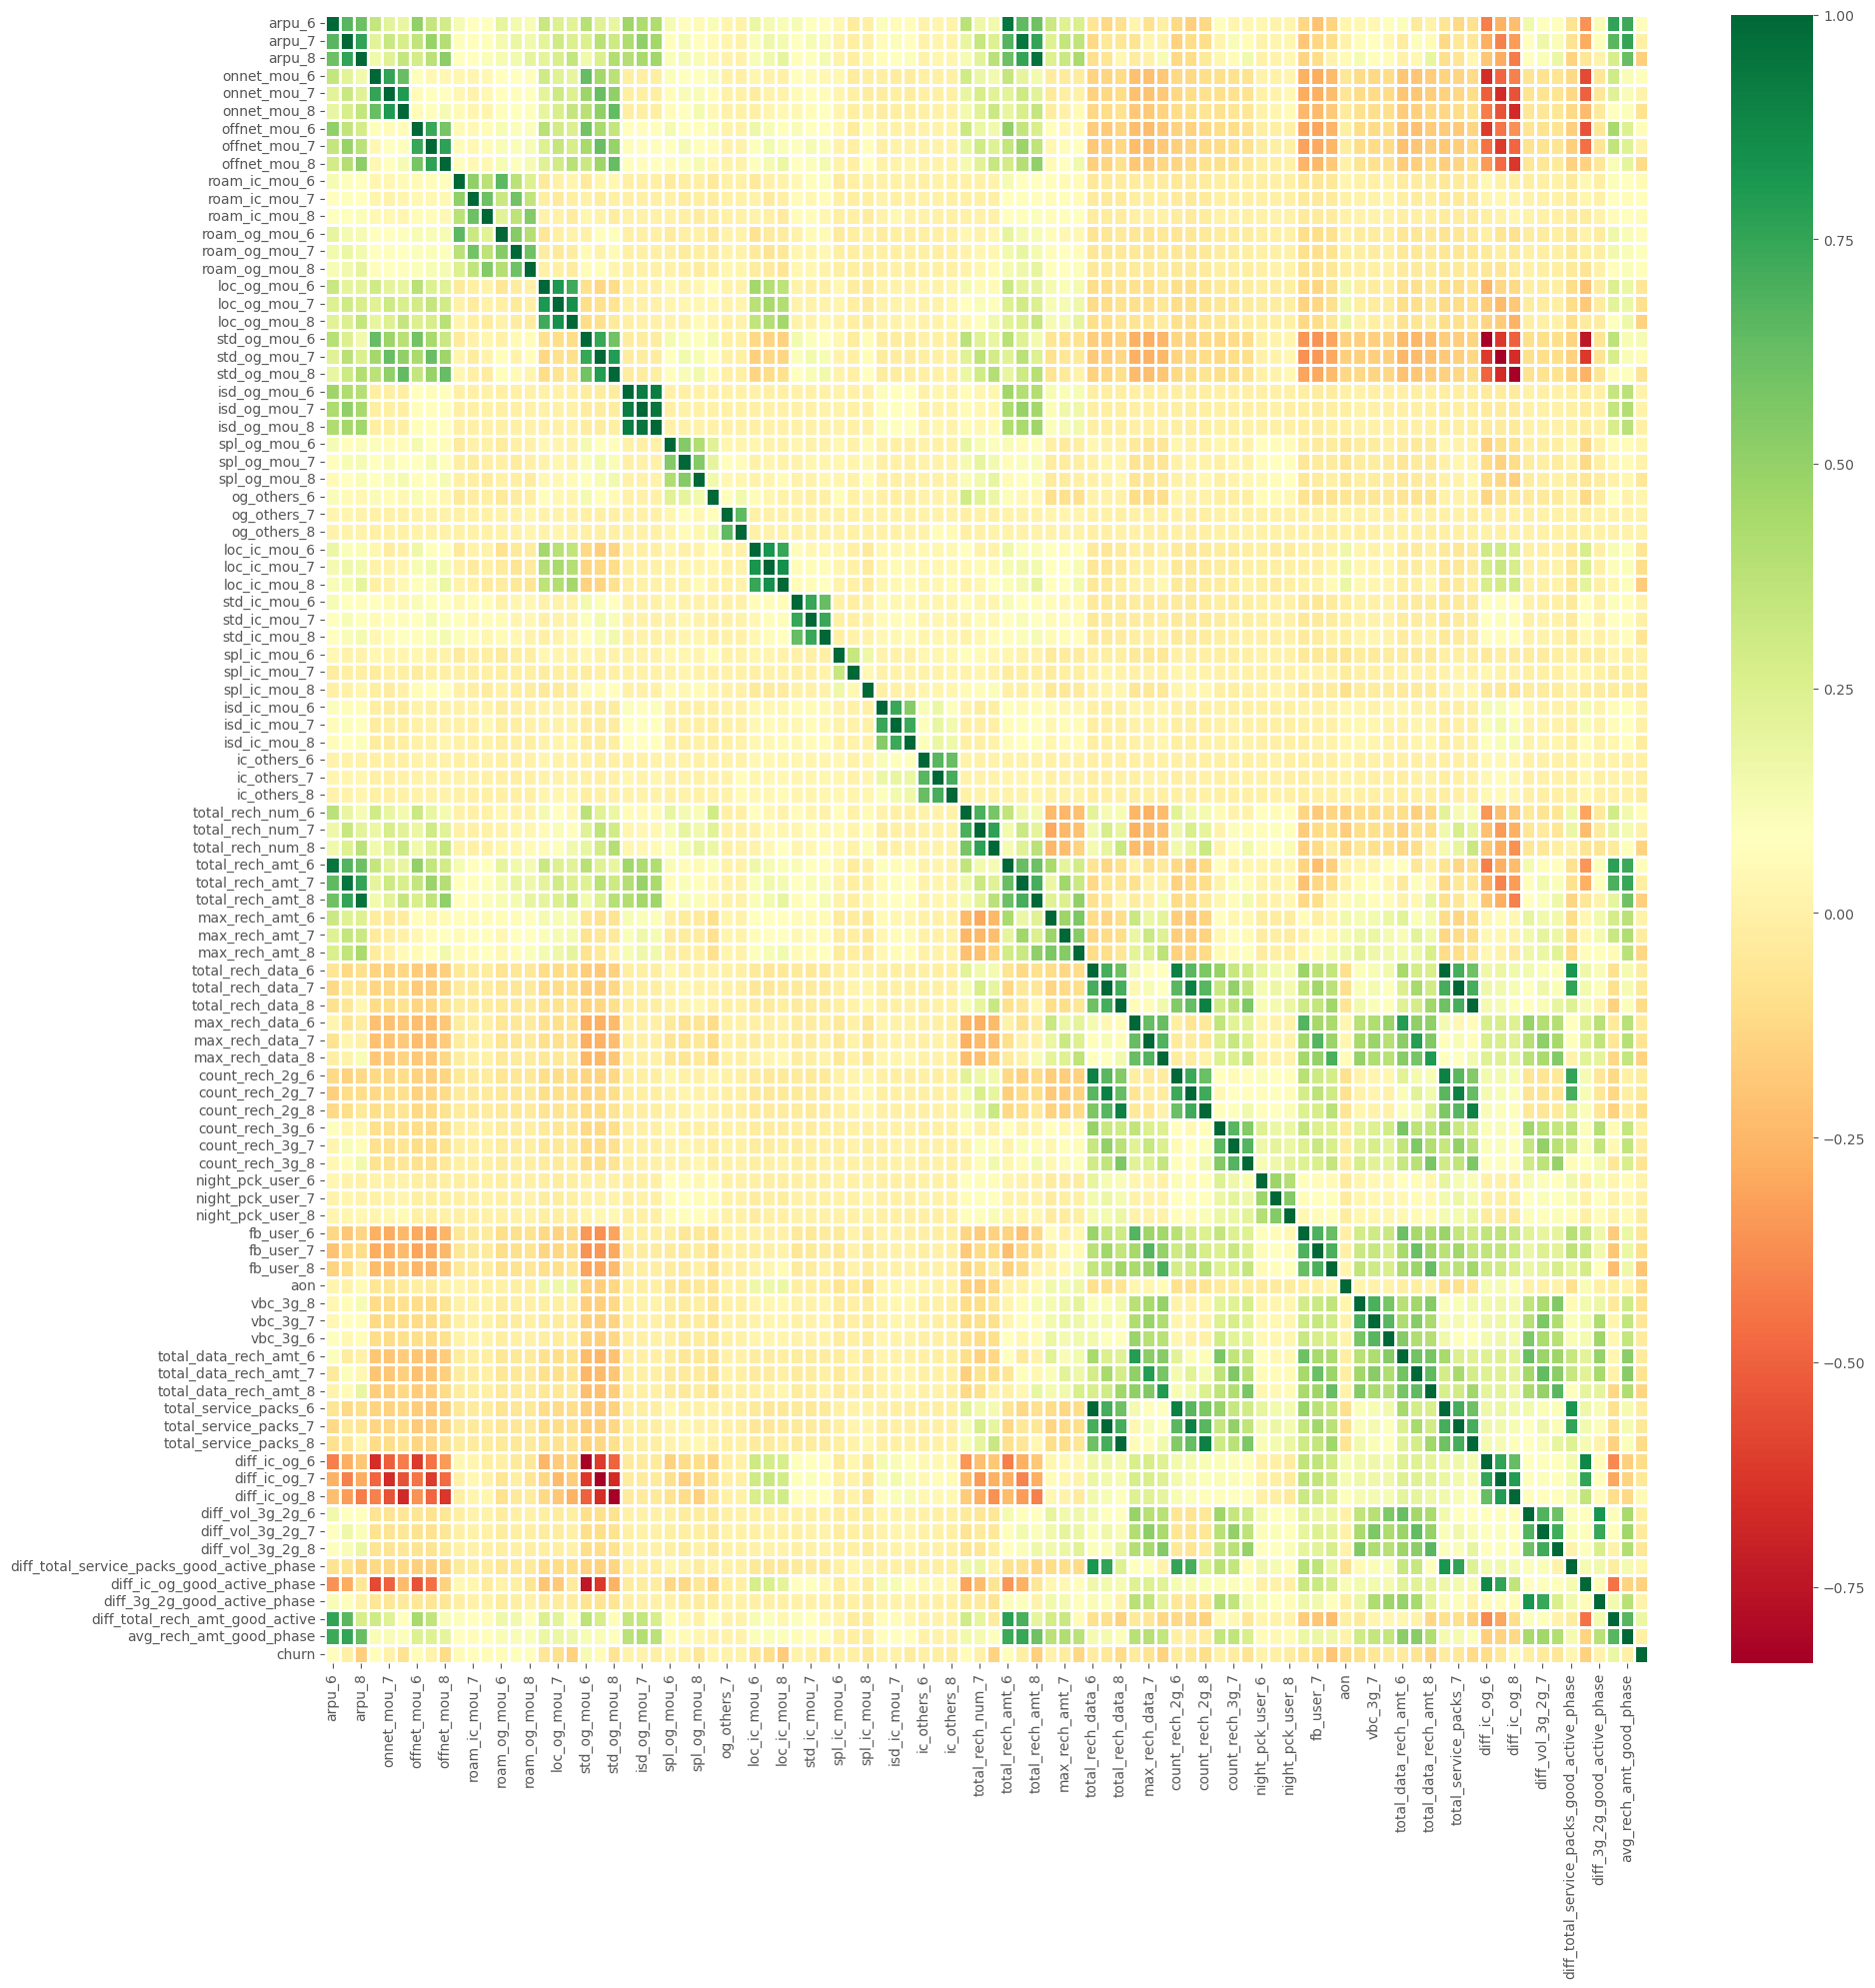

In [1754]:
plt.figure(figsize = [20,20])
sns.heatmap(data = corrmatrix, cmap = 'RdYlGn', linewidth = 1) # plot the heatmap of the correlation matrix
plt.tight_layout()

**User defined function to find and highlight the top N correlation in a dataframe**

In [1755]:
def top_n_corr(df,n):
    
    corr = df.corr()
    corr = corr.unstack().reset_index()
    corr = corr.rename({0:'corr_value',
                        'level_0':'var_1',
                        'level_1':'var_2'}, axis = 1)

    corr = corr[~(corr['var_1'] == corr['var_2'])]
    corr['combined_var'] = corr.apply(lambda x : sorted([x.var_1, x.var_2]), axis = 1)
    corr = corr[~corr['combined_var'].duplicated(keep = 'first')]

    corr['abs_corr_value'] = corr['corr_value'].abs()
    corr['corr_dir'] = corr['corr_value'].apply(lambda x : 'Positive' if x > 0 else 'Negative' if x < 0 else 'No Correlation')
    corr.sort_values(by = 'abs_corr_value', ascending = False, inplace = True)
    corr.drop(['combined_var','corr_value'], axis = 1, inplace = True)
    corr_n = corr.head(n)
    corr_n.reset_index(drop = True, inplace = True)
    
    return corr_n

In [1756]:
# lets look at the top25 correlations

top_n_corr(tel_hv,25)

,var_1,var_2,abs_corr_value,corr_dir
0,total_rech_data_7,total_service_packs_7,1.000000,Positive
1,total_rech_data_6,total_service_packs_6,1.000000,Positive
2,total_rech_data_8,total_service_packs_8,1.000000,Positive
3,arpu_8,total_rech_amt_8,0.954854,Positive
4,arpu_6,total_rech_amt_6,0.945126,Positive
5,isd_og_mou_7,isd_og_mou_8,0.943082,Positive
6,arpu_7,total_rech_amt_7,0.942917,Positive
7,isd_og_mou_6,isd_og_mou_8,0.918056,Positive
8,isd_og_mou_6,isd_og_mou_7,0.915244,Positive
9,total_rech_data_6,count_rech_2g_6,0.904560,Positive


**Inference :**

    - looks like variables are highly correlated in nature

### Data Preperation

    1.Outliers Treatment
    2.Feature Engineering
    3.Handling Class Imbalance using SMOTE

**Outlier Treatment**

**Strategy :** Capping the variables containing outliers
    
    - lower capping : 0.1 percentile
    - upper capping : 99.9 percentile

In [1757]:
binary_cols = tel_hv.columns[tel_hv.nunique() == 2] # selecting the binary columns

# selecting the numeric columns excluding the binary columns

num_cols = tel_hv.drop(binary_cols, axis = 1).select_dtypes(include = np.number).columns

In [1758]:
for var in num_cols:
    
    low = np.percentile(tel[var],0.1) # arriving at lower cap
    high = np.percentile(tel[var],99.9) # arring at upper cap

    tel[var] = tel[var].apply(lambda x : high if x > high else x)
    tel[var] = tel[var].apply(lambda x : low if x < low else x)

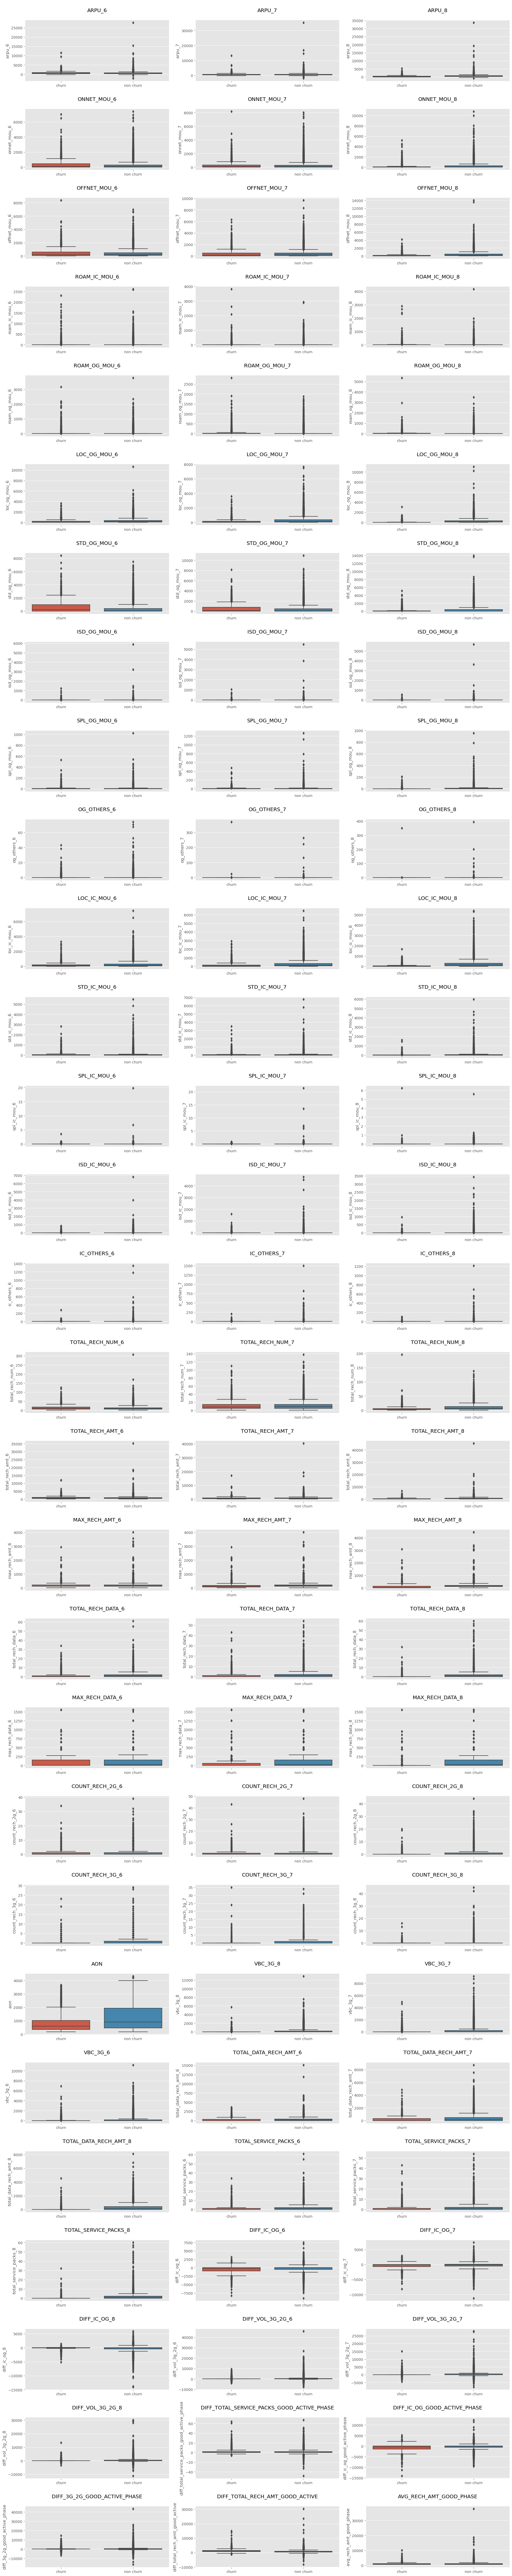

In [1759]:
# plotting the numeric variables to have a look at outliers

n_cols = 3
n_rows = round(len(num_cols)+1/n_cols)

plt.figure(figsize = [20,300])
for ind,var in enumerate(num_cols):
    pos = ind+1 
    plt.subplot(n_rows,n_cols,pos)
    plt.title('\n'+str(var).upper()+'\n')
    x_var = tel_hv['churn'].apply(lambda x: 'churn' if x == 1 else 'non churn')
    sns.boxplot(y = tel_hv[var], x = x_var)
    plt.xlabel('')
plt.tight_layout()

Inference :
    
    - We have fairly treated the outliuers in the dataframe

**2.Feature Engineering**

**Strategy :** Month 6 and 7th are good phase. We will use a average value of Month 6 and 7 to determine goodphase values. 

This will also reduce the number of features for model building. 

In [1760]:
# Listing the column-kind which can be extracted from 6 & 7 months

cols_kind = ["vbc_3g","total_data_rech_amt"]

In [1761]:
for item in cols_kind:

    col_6 = item + '_6' # arriving the column name for 6th month
    col_7 = item + '_7' # arriving the column name for 7th month
    col_8 = item + '_8' # arriving the column name for 8th month
    
    tel_hv[item+'_good_phase'] = tel_hv[[col_6,col_7]].mean(axis = 1) # arring at good phase variable
    tel_hv[item+'_action_phase'] = tel_hv[col_8] # arriving at action phase variable
    
    tel_hv.drop([col_6,col_7,col_8], axis = 1,inplace =True) # dropping the respective month columns

In [1762]:
tel_hv.shape

(30034, 98)

**3.Coversion of Date columns into codes**

In [1763]:
tel_hv.dtypes.value_counts() # lets check the data types of the dataframe

float64           70
int64             22
datetime64[ns]     6
dtype: int64

In [1764]:
date_cols = tel_hv.select_dtypes(include= 'datetime64').columns # lets select the date columns

In [1765]:
for var in date_cols:
    tel_hv[var] = tel_hv[var].astype('category').cat.codes # convert the date columns to codes

In [1766]:
tel_hv.dtypes.value_counts() # Check the data types once again

float64    70
int64      22
int8        6
dtype: int64

Inference :
    
    - All columns are numerical now

**4.Handling Class Imbalance using SMOTE**

**SMOTE**: Synthetic Minority Oversampling Technique

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together

**Lets plot the balance of the target variable**

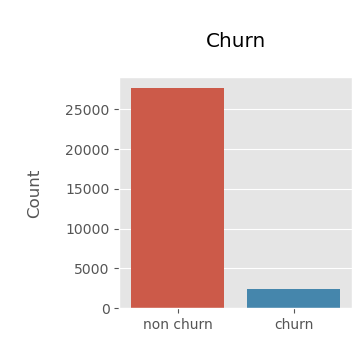

,value,count,distribution
0,0,27636,92.02
1,1,2398,7.98


In [1767]:
plt.figure(figsize=[3,3])
s = tel_hv['churn'].apply(lambda x: 'churn' if x == 1 else 'non churn').value_counts()
sns.barplot(x = s.index, y = s)
plt.title('\nChurn\n')
plt.ylabel('\nCount\n')
plt.show()
simple_stat(tel_hv,'churn')

Inference :
    
    - We can clearly see the imbalance in the target variable 

In [1768]:
from imblearn.over_sampling import SMOTE # library for oversamplig the target variable
from sklearn.model_selection import train_test_split # library for train_test split
from sklearn.preprocessing import StandardScaler # libary for standardisation

In [1769]:
X = tel_hv.drop('churn', axis = 1) # selecting the independant variables
y = tel_hv['churn'] # selecting the dependant variabl

In [1770]:
## splitting the dataframe to train - test chunks 

X_train,X_test,y_train, y_test = train_test_split(X,y, random_state=100, train_size = 0.70, stratify = y)

In [1771]:
# Lets see the shape of the train-test split

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(21023, 97) (9011, 97)
(21023,) (9011,)


In [1772]:
scaler = StandardScaler() # creating a strandard scaler object

In [1773]:
X_train[:] = scaler.fit_transform(X_train) # learning and applying the standard scaling to training dataframe

In [1774]:
X_test[:] = scaler.transform(X_test) # applying the standard scaling to testing dataframe

In [1775]:
sm = SMOTE(random_state = 100, sampling_strategy = 1.0) # creating the SMOTE object

X_train, y_train = sm.fit_resample(X_train, y_train) # applyig the oversampling in the training dataset

In [1776]:
X_train.shape

(38688, 97)

**Lets plot the balance of the target variable - Again**

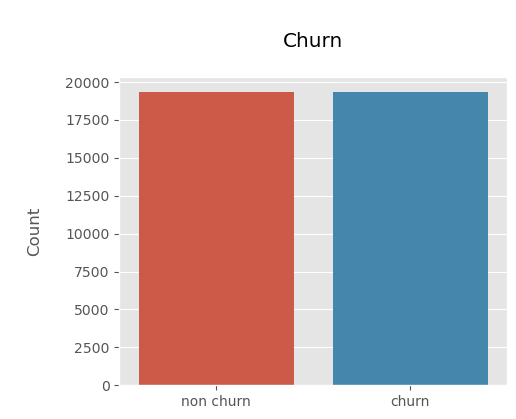

In [1777]:
plt.figure(figsize=[5,4])
s = y_train.apply(lambda x: 'churn' if x == 1 else 'non churn').value_counts()
sns.barplot(x = s.index, y = s)
plt.title('\nChurn\n')
plt.ylabel('\nCount\n')
plt.show()

### Performing PCA on Feature Reduction

**Principal Component Analysis (PCA) :** is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.
PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models. 

Moreover, PCA is an unsupervised statistical technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit.

In [1778]:
from sklearn.decomposition import PCA # library for PCA

In [1779]:
pca = PCA(svd_solver= 'randomized', random_state = 42) # creating a PCA object

In [1780]:
pca.fit(X_train) # fitting the training dataset in the PCA object

PCA(random_state=42, svd_solver='randomized')

In [1781]:
pca.components_

array([[ 1.30842729e-01,  1.08792031e-01,  4.96092785e-02, ...,
        -7.40311456e-02, -1.67282800e-01, -1.20032357e-01],
       [ 1.75569092e-01,  2.26147848e-01,  2.11332212e-01, ...,
         9.37860426e-02,  1.37395152e-01,  1.41422382e-01],
       [ 1.02623460e-01,  9.43172806e-02,  1.06466629e-01, ...,
         8.07021269e-02,  7.02908847e-02,  6.98940056e-02],
       ...,
       [-0.00000000e+00, -2.75965491e-16,  3.01016917e-16, ...,
         2.64338263e-16,  9.40809399e-03,  2.80083203e-16],
       [-0.00000000e+00, -3.43309278e-17,  8.21320189e-17, ...,
         2.09337378e-16, -4.99367653e-11, -2.27420611e-16],
       [ 0.00000000e+00,  3.09662302e-17, -1.20659944e-16, ...,
        -1.43043411e-16, -4.18367250e-11, -3.32453688e-17]])

In [1782]:
pca.explained_variance_ratio_ # lets look at the explained variance ratio

array([1.49687558e-01, 9.02137756e-02, 7.33050971e-02, 5.55862999e-02,
       5.03033396e-02, 4.10652267e-02, 2.94746093e-02, 2.83907705e-02,
       2.57431784e-02, 2.39451547e-02, 2.29004445e-02, 2.16397809e-02,
       1.99404497e-02, 1.82885125e-02, 1.73543988e-02, 1.71202830e-02,
       1.53762444e-02, 1.47786749e-02, 1.34374081e-02, 1.31717639e-02,
       1.19090291e-02, 1.12116099e-02, 1.09387289e-02, 1.08011168e-02,
       1.04955826e-02, 1.01326539e-02, 9.95529545e-03, 9.69548415e-03,
       8.97222638e-03, 8.56866724e-03, 8.03759073e-03, 7.74844539e-03,
       7.47124496e-03, 7.01076316e-03, 6.74362153e-03, 6.59905074e-03,
       6.23969070e-03, 5.29881946e-03, 5.11714702e-03, 4.92483538e-03,
       4.82549865e-03, 4.52203500e-03, 4.42402310e-03, 4.26260232e-03,
       4.02883032e-03, 4.01709070e-03, 3.82328358e-03, 3.72058537e-03,
       3.58148996e-03, 3.44261285e-03, 3.37398103e-03, 3.15236504e-03,
       3.14230679e-03, 2.80348584e-03, 2.73892844e-03, 2.54838301e-03,
      

In [1783]:
# lets look at the cumulative summary of the principle variance ratio

pca_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

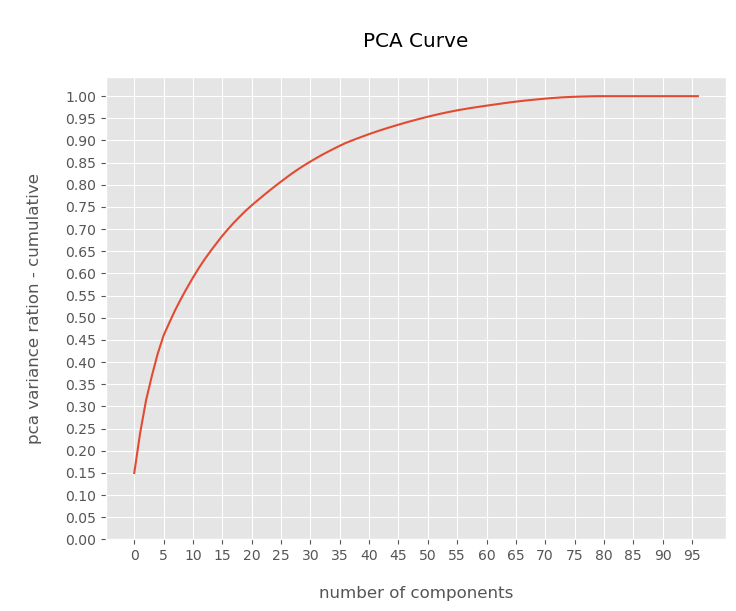

In [1784]:
# Lets plot the pca variance ratio - cumulative sum

plt.figure(figsize = [8,6])
plt.title('\nPCA Curve\n')
plt.plot(pca_variance_ratio_cumsum)
plt.xlabel('\nnumber of components')
plt.ylabel('\npca variance ration - cumulative\n')
plt.xticks(np.arange(0, X_train.shape[1]+1,5))
plt.yticks(np.arange(0,1.05,0.05))
plt.show()

**Inference :**

**It is evident that 55 components can explain more than 95% of the variance**

In [1785]:
from sklearn.decomposition import IncrementalPCA # import increamental PCA

In [1786]:
pca_final = IncrementalPCA(n_components=55) # arrive 55 principle components object

In [1787]:
train_pca = pca_final.fit_transform(X_train) # applying on the training dataset

In [1788]:
train_pca.shape

(38688, 55)

In [1789]:
# lets chcek the correlation matrix again after applying the PCA

corr_25 = top_n_corr(pd.DataFrame(train_pca),25)
print('\nMax corraltion coff value : ',corr_25['abs_corr_value'].max())
print('\nMin corraltion coff value : ',corr_25['abs_corr_value'].min())
corr_25


Max corraltion coff value :  0.012446018528355758

Min corraltion coff value :  0.004767246241616904


,var_1,var_2,abs_corr_value,corr_dir
0,52,54,0.012446,Positive
1,36,54,0.012066,Negative
2,50,52,0.011143,Negative
3,7,54,0.009947,Negative
4,45,52,0.009902,Positive
5,30,54,0.009441,Positive
6,52,53,0.009075,Positive
7,40,54,0.008181,Negative
8,34,54,0.008129,Negative
9,50,54,0.007989,Negative


Inference :
    
    - It very clear that after applying pca, there is no correlation between the principle components

In [1790]:
test_pca = pca_final.transform(X_test) # applying the pca to the test dataset

In [1791]:
test_pca.shape

(9011, 55)

### Model Building

    1.Logistic Regression
    2.Support Vector Machines
    3.Random Forest

### Model 1 : Logistic Regression (with PCA)

In [1792]:
from sklearn.linear_model import LogisticRegression # Import the logistic regression class
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [1793]:
logreg = LogisticRegression() # creating a logistic regression object

In [1794]:
logreg.fit(train_pca,y_train) #fitting the train dataset to the logistic regression object

LogisticRegression()

***predict the probabilty***

In [1795]:
y_train_pred = logreg.predict_proba(train_pca) # predict the probability for the trainig dataset

In [1796]:
y_train_pred = y_train_pred[:,-1] # reshape

In [1797]:
# creting predict dataframe with actual churn

predict_train = pd.DataFrame({'churn':y_train,'churn_pred':y_train_pred})

In [1798]:
predict_train.head()

,churn,churn_pred
0,0,0.130135
1,0,0.533312
2,0,0.358965
3,0,0.387674
4,0,0.085572


***arriving the optimal cutoff***

In [1799]:
cutoffs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # reccomended cuttoff points

In [1800]:
for cut in cutoffs:
    predict_train[cut] = predict_train['churn_pred'].apply(lambda x: 1 if x > cut else 0)

In [1801]:
predict_train

,churn,churn_pred,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.130135,1,0,0,0,0,0,0,0,0
1,0,0.533312,1,1,1,1,1,0,0,0,0
2,0,0.358965,1,1,1,0,0,0,0,0,0
3,0,0.387674,1,1,1,0,0,0,0,0,0
4,0,0.085572,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
38683,1,0.825042,1,1,1,1,1,1,1,1,0
38684,1,0.250457,1,1,0,0,0,0,0,0,0
38685,1,0.860738,1,1,1,1,1,1,1,1,0
38686,1,0.861606,1,1,1,1,1,1,1,1,0


**User Defined fuction to show Metrics**

In [1802]:
def show_metrics(y_true, y_pred):
    
    cm = confusion_matrix(y_true,y_pred)

    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives

    accuracy = (TP + TN) / (TP + TN + FP + FN) # accuracy
    sensitivity = TP / float(TP+FN) # sensitivity
    specificity = TN / float(TN+FP) # specificity
    precision = precision_score(y_true,y_pred) # precision
    recall = recall_score(y_true,y_pred) # recall
    roc_auc = roc_auc_score(y_true,y_pred) # roc auc score

    label = ['accuracy','sensitivity','specificity','precision','recall','roc_auc']
    values = [accuracy,sensitivity,specificity,precision,recall,roc_auc]
    metrics_df = pd.DataFrame({'label':label,'value':values})
    
    cm = pd.DataFrame(data = cm, columns = ['not churn','churn'], index = ['not churn','churn'])
    
    return cm,metrics_df

In [1803]:
# Creating the list metrics of all the reccomended cutoffs

record_ls = [] 

for cut in cutoffs:
    
    cm,metrics_df = show_metrics(predict_train['churn'],predict_train[cut]) # calling the show metric function
    
    record = list(metrics_df['value'])
    record_ls.append(record) # creating a list of list of values for variouse matrix

In [1804]:
# Creating a dataframe with all the recomended cut-offs and their respective metrics

cols = ['accuracy','specificity','sensitivity','precision','recall','roc_auc']

cutoff_matrix = pd.DataFrame(record_ls, columns = cols, index = cutoffs)

cutoff_matrix.index.name = 'cutoffs'
cutoff_matrix.reset_index(inplace=True)
cutoff_matrix

,cutoffs,accuracy,specificity,sensitivity,precision,recall,roc_auc
0,0.1,0.697839,0.980045,0.415633,0.626462,0.980045,0.697839
1,0.2,0.768869,0.955232,0.582506,0.695865,0.955232,0.768869
2,0.3,0.806736,0.923956,0.689516,0.748482,0.923956,0.806736
3,0.4,0.825010,0.885753,0.764268,0.789804,0.885753,0.825010
4,0.5,0.835892,0.845844,0.825941,0.829338,0.845844,0.835892
5,0.6,0.836668,0.797663,0.875672,0.865153,0.797663,0.836668
6,0.7,0.820590,0.728081,0.913100,0.893371,0.728081,0.820590
7,0.8,0.774271,0.600341,0.948201,0.920571,0.600341,0.774271
8,0.9,0.654983,0.331317,0.978650,0.939461,0.331317,0.654983


***ploting the metrics and arriving at the optimal points***

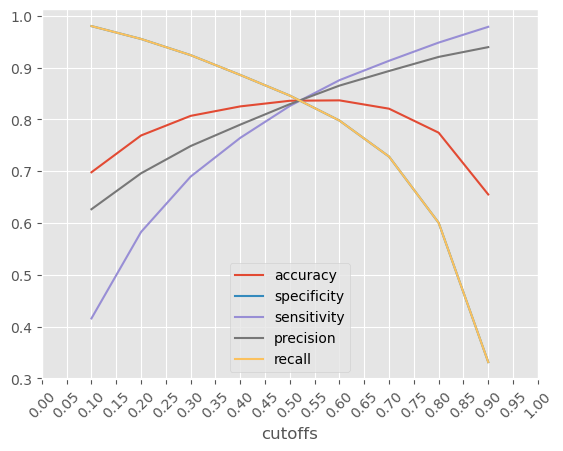

In [1805]:
# ploting based on the above table

y_cols = ['accuracy','specificity','sensitivity','precision','recall']
cutoff_matrix.plot.line(x = 'cutoffs', y = y_cols)
plt.xticks(np.arange(0,1.05,0.05), rotation = 45)
plt.show()

**Inference :**
    
    cutoffs value - 0.53 could be the optimum value for from the above plot

In [1806]:
optimum_cutoff = 0.53

# applying the optimum cutoff and arriving at the final prediction

predict_train['churn_pred_final'] = predict_train['churn_pred'].apply(lambda x : 1 if x > optimum_cutoff else 0)

predict_train.head()

,churn,churn_pred,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,churn_pred_final
0,0,0.130135,1,0,0,0,0,0,0,0,0,0
1,0,0.533312,1,1,1,1,1,0,0,0,0,1
2,0,0.358965,1,1,1,0,0,0,0,0,0,0
3,0,0.387674,1,1,1,0,0,0,0,0,0,0
4,0,0.085572,0,0,0,0,0,0,0,0,0,0


In [1807]:
y_test_pred = logreg.predict_proba(test_pca)[:,-1] # predicting for testing dataset

predict_test = pd.DataFrame({'churn':y_test,'prob_predict':y_test_pred}) # creating dataframe

predict_test['churn_pred_final'] = predict_test['prob_predict'].apply(lambda x : 1 if x > optimum_cutoff else 0)

predict_test.head()

,churn,prob_predict,churn_pred_final
26065,0,0.141783,0
9308,0,0.005804,0
4100,0,0.103354,0
18883,0,0.297505,0
2440,0,0.184893,0


**Evaluating the Model**

***> Train DataSet***

In [1808]:
# Getting the metrics on train dataset

train_cm,train_metric = show_metrics(predict_train['churn'],predict_train['churn_pred_final'])

print(train_cm)
train_metric

           not churn  churn
not churn      16285   3059
churn           3229  16115


,label,value
0,accuracy,0.837469
1,sensitivity,0.833075
2,specificity,0.841863
3,precision,0.840461
4,recall,0.833075
5,roc_auc,0.837469


***> Test DataSet***

In [1809]:
# Getting the metric on test dataset

test_cm,test_metric = show_metrics(predict_test['churn'],predict_test['churn_pred_final'])
print(test_cm)
test_metric

           not churn  churn
not churn       6933   1359
churn            168    551


,label,value
0,accuracy,0.830540
1,sensitivity,0.766342
2,specificity,0.836107
3,precision,0.288482
4,recall,0.766342
5,roc_auc,0.801225


***> Train vs Test Evaluation***

**User Defined function to display comparison btw Train & Test Evaluation**

In [1810]:
def train_vs_test_evaluation(train_metric,test_metric):

    label = train_metric['label']
    train_value = train_metric['value']
    test_value = test_metric['value']
    proportion = train_value/test_value
    train_test_metric = pd.DataFrame({'label':label,
                                      'on_train_data':train_value,
                                      'on_test_data':test_value,
                                      'train - test ratio':proportion})
    return train_test_metric

In [1811]:
# Evalation on train data vs Evalution test data

train_test_eval = train_vs_test_evaluation(train_metric,test_metric)
train_test_eval

,label,on_train_data,on_test_data,train - test ratio
0,accuracy,0.837469,0.830540,1.008342
1,sensitivity,0.833075,0.766342,1.087080
2,specificity,0.841863,0.836107,1.006884
3,precision,0.840461,0.288482,2.913395
4,recall,0.833075,0.766342,1.087080
5,roc_auc,0.837469,0.801225,1.045236


**Inference :**
    

In [1812]:
metric_model_1 = list(train_test_eval['on_test_data'].round(2))
metric_model_1

[0.83, 0.77, 0.84, 0.29, 0.77, 0.8]

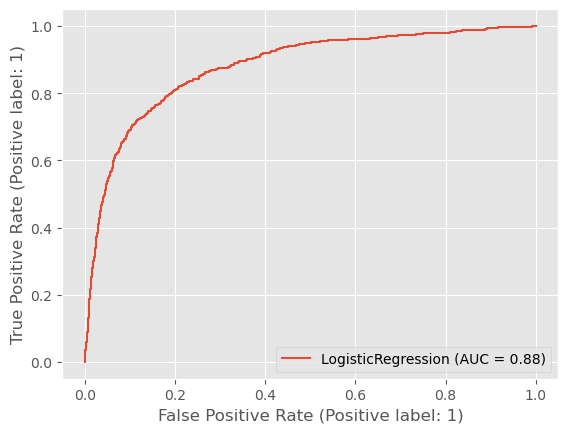

In [1813]:
plot_roc_curve(estimator = logreg, X = test_pca, y = y_test)
plt.show()

### Model 2 : SVM - Support Vector Machines (with PCA)

In [1814]:
from sklearn.svm import SVC # importing svc from svm

**> Learning**

In [1815]:
# using rbf kernel, C=1, default value of gamma

svc = SVC(C = 1, kernel='rbf')

In [1816]:
svc.fit(train_pca,y_train) #fitting the train data in the svc object

%time # to display the execution time of the cell

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


**> Prediction**

In [1817]:
predict_train = svc.predict(train_pca) # predicting on train data
predict_test = svc.predict(test_pca) # predicting on the test data
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [1818]:
train_cm,train_metric = show_metrics(y_train,predict_train)

print(train_cm) 
train_metric # displaying the evaluation metrics on train data

           not churn  churn
not churn      17507   1837
churn           1403  17941


,label,value
0,accuracy,0.916253
1,sensitivity,0.927471
2,specificity,0.905035
3,precision,0.907119
4,recall,0.927471
5,roc_auc,0.916253


In [1819]:
test_cm,test_metric = show_metrics(y_test,predict_test) 

print(test_cm) 
test_metric # displaying the evaluation metrics on test data

           not churn  churn
not churn       7398    894
churn            202    517


,label,value
0,accuracy,0.878371
1,sensitivity,0.719054
2,specificity,0.892185
3,precision,0.366407
4,recall,0.719054
5,roc_auc,0.805620


In [1820]:
# Evalation on train data vs Evalution test data

train_test_eval = train_vs_test_evaluation(train_metric,test_metric)
train_test_eval

,label,on_train_data,on_test_data,train - test ratio
0,accuracy,0.916253,0.878371,1.043128
1,sensitivity,0.927471,0.719054,1.289849
2,specificity,0.905035,0.892185,1.014403
3,precision,0.907119,0.366407,2.475716
4,recall,0.927471,0.719054,1.289849
5,roc_auc,0.916253,0.805620,1.137327


In [1821]:
metric_model_2 = list(train_test_eval['on_test_data'].round(2))
metric_model_2

[0.88, 0.72, 0.89, 0.37, 0.72, 0.81]

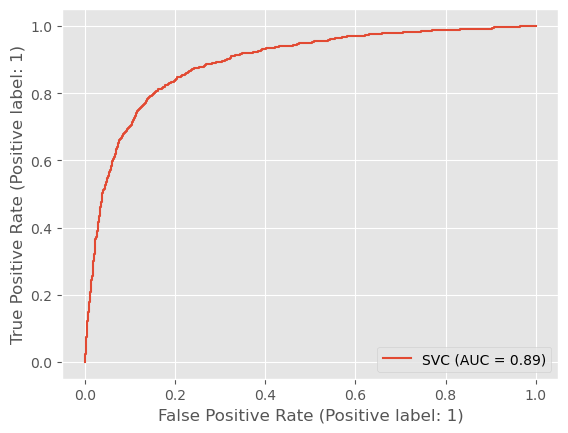

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [1822]:
# plotting the roc curve on the svm prediction

plot_roc_curve(estimator = svc, X = test_pca, y = y_test)
plt.show()
%time

### Model 3 : SVM with - Hyperparameter Tuning (with PCA)

Now, we have multiple hyperparameters to optimise - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma

**We'll use the `GridSearchCV()` method to tune the hyperparameters**

In [1823]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

***> Setting the hyperparameters for the model to learn***

In [1824]:
folds = KFold(n_splits = 4, shuffle = True, random_state = 5) # 4 split cross validation scheme

hyper_parameters = [{'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100]}]

svc_tuning_model = SVC(kernel='rbf')

grid_cv_svm = GridSearchCV(estimator = svc_tuning_model,
            param_grid= hyper_parameters,
            cv=folds,
            scoring='roc_auc',
            n_jobs= -1,
            verbose = 1,
            return_train_score=True)

***> Learning***

In [1825]:
grid_cv_svm.fit(train_pca,y_train) # grid search cv object to fit the training data

%time

Fitting 4 folds for each of 9 candidates, totalling 36 fits
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


In [1826]:
cv_results = pd.DataFrame(grid_cv_svm.cv_results_) # gridsearch cv -results display
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,176.079623,7.061224,17.322105,1.098670,1,0.01,"{'C': 1, 'gamma': 0.01}",0.953174,0.954053,0.950346,0.955810,0.953346,0.001975,3,0.959442,0.959327,0.959785,0.958727,0.959320,0.000382
1,207.479323,5.785083,23.185314,2.487987,1,0.001,"{'C': 1, 'gamma': 0.001}",0.917195,0.915089,0.913096,0.918549,0.915982,0.002073,7,0.916762,0.918140,0.918208,0.916584,0.917423,0.000753
2,274.093637,12.670188,35.993081,1.689665,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.903458,0.900484,0.899180,0.904529,0.901913,0.002164,9,0.901785,0.902770,0.903168,0.901510,0.902308,0.000683


***> Find the best model from the grid search cross validation scheme***

In [1827]:
best_score = grid_cv_svm.best_score_ # best score from all the fits 

best_score

0.9821285374259772

In [1828]:
best_estimator = grid_cv_svm.best_estimator_ # best estimator/model from all the fits 

best_estimator

SVC(C=100, gamma=0.01)

**> Prediction**

In [1829]:
predict_train = best_estimator.predict(train_pca) # prediction on train dataset
predict_test = best_estimator.predict(test_pca) # prediction on testing dataset
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


***> Evaluation***

In [1830]:
train_cm,train_metric = show_metrics(y_train,predict_train)

print(train_cm) 
train_metric # displaying the evaluation metrics on train data

           not churn  churn
not churn      18806    538
churn             40  19304


,label,value
0,accuracy,0.985060
1,sensitivity,0.997932
2,specificity,0.972188
3,precision,0.972886
4,recall,0.997932
5,roc_auc,0.985060


In [1831]:
test_cm,test_metric = show_metrics(y_test,predict_test)

print(test_cm) 
test_metric # displaying the evaluation metrics on test data

           not churn  churn
not churn       7758    534
churn            375    344


,label,value
0,accuracy,0.899123
1,sensitivity,0.478442
2,specificity,0.935601
3,precision,0.391800
4,recall,0.478442
5,roc_auc,0.707021


In [1832]:
# Evalation on train data vs Evalution test data

train_test_eval = train_vs_test_evaluation(train_metric,test_metric)
train_test_eval

,label,on_train_data,on_test_data,train - test ratio
0,accuracy,0.985060,0.899123,1.095578
1,sensitivity,0.997932,0.478442,2.085794
2,specificity,0.972188,0.935601,1.039106
3,precision,0.972886,0.391800,2.483121
4,recall,0.997932,0.478442,2.085794
5,roc_auc,0.985060,0.707021,1.393253


In [1833]:
metric_model_3 = list(train_test_eval['on_test_data'].round(2))
metric_model_3

[0.9, 0.48, 0.94, 0.39, 0.48, 0.71]

### Model 4 : Random Forest (with PCA)

In [1834]:
from sklearn.ensemble import RandomForestClassifier # import RandomForest Classifier

In [1835]:
rfc = RandomForestClassifier() # Creating random forest object

***> Learning***

In [1836]:
rfc.fit(train_pca,y_train)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


***> Prediction***

In [1837]:
predict_train = rfc.predict(train_pca) # predicting on training data
predict_test = rfc.predict(test_pca) # predicting on the testing dataset

***> Evaluation***

In [1838]:
train_cm,train_metric = show_metrics(y_train,predict_train)

print(train_cm) 
train_metric # displaying the evaluation metrics on train data

           not churn  churn
not churn      19344      0
churn              0  19344


,label,value
0,accuracy,1.0
1,sensitivity,1.0
2,specificity,1.0
3,precision,1.0
4,recall,1.0
5,roc_auc,1.0


In [1839]:
test_cm,test_metric = show_metrics(y_test,predict_test)

print(test_cm) 
test_metric # displaying the evaluation metrics on test data

           not churn  churn
not churn       7870    422
churn            347    372


,label,value
0,accuracy,0.914660
1,sensitivity,0.517385
2,specificity,0.949108
3,precision,0.468514
4,recall,0.517385
5,roc_auc,0.733246


In [1840]:
# Evalation on train data vs Evalution test data

train_test_eval = train_vs_test_evaluation(train_metric,test_metric)
train_test_eval

,label,on_train_data,on_test_data,train - test ratio
0,accuracy,1.0,0.914660,1.093303
1,sensitivity,1.0,0.517385,1.932796
2,specificity,1.0,0.949108,1.053621
3,precision,1.0,0.468514,2.134409
4,recall,1.0,0.517385,1.932796
5,roc_auc,1.0,0.733246,1.363798


In [1841]:
metric_model_4 = list(train_test_eval['on_test_data'].round(2))
metric_model_4

[0.91, 0.52, 0.95, 0.47, 0.52, 0.73]

## Building Interpretable Models with RFE

In [1842]:
tel_hv.shape

(30034, 98)

In [1843]:
tel_hv['churn'].value_counts(normalize=True) # Target variable distribution

0    0.920157
1    0.079843
Name: churn, dtype: float64

In [1844]:
X = tel_hv.drop('churn', axis = 1) # Independent Variable
y = tel_hv['churn'] # Target variable

In [1845]:
# Train test Split

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state= 100, train_size= 0.7, stratify=y) 

***SMOTE oversampling to overcome the target variable imbalance***

In [1846]:
sm = SMOTE(random_state = 100, sampling_strategy = 1.0)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [1847]:
y_train.value_counts(normalize=True) # confirming the balance of the target variable

0    0.5
1    0.5
Name: churn, dtype: float64

***> Scaling of the variables***

In [1848]:
scaler_2 = StandardScaler() # creating a new scaler object for standardisation

In [1849]:
X_train[:] = scaler_2.fit_transform(X_train) # Learning and transforming the train datset

In [1850]:
X_test[:] = scaler_2.transform(X_test) # Transforming test dataset on the same scaler object

***> Feature Elimination using RFE***

In [1851]:
logreg_interpretation = LogisticRegression() # creating logistic regression object

In [1852]:
from sklearn.feature_selection import RFE # importing the RFE Class from sklearn

In [1853]:
rfe = RFE(estimator=logreg_interpretation,n_features_to_select=60) # creating the rfe object with 60 features

In [1854]:
rfe.fit(X_train,y_train) # fitting the rfe object on the training dataset

RFE(estimator=LogisticRegression(), n_features_to_select=60)

In [1855]:
sel_cols = X_train.columns[rfe.support_] # selecting the list of columns suggested by the rfe object

In [1856]:
X_train = X_train[sel_cols] # redefining the train dataset with selected columns
X_test = X_test[sel_cols] # redefining the test dataset with selected columns

### Model 5 : Random Forest ( without Hyperparamer Tuning ) with RFE

***> Model Building***

In [1857]:
rfc_simple = RandomForestClassifier() # creating a random forest classifier object

***> Learning***

In [1858]:
rfc_simple.fit(X_train,y_train) # fitting the training dataset in the rfc instance

RandomForestClassifier()

***> Prediction***

In [1859]:
predict_train = rfc_simple.predict(X_train) # predicting on the training dataset
predict_test = rfc_simple.predict(X_test) # predicting on the testing dataset

***> Evaluation***

In [1860]:
train_cm,train_metric = show_metrics(y_train,predict_train)

print(train_cm) 
train_metric # displaying the evaluation metrics on test data

           not churn  churn
not churn      19344      0
churn              0  19344


,label,value
0,accuracy,1.0
1,sensitivity,1.0
2,specificity,1.0
3,precision,1.0
4,recall,1.0
5,roc_auc,1.0


In [1861]:
test_cm,test_metric = show_metrics(y_test,predict_test)

print(test_cm) 
test_metric # displaying the evaluation metrics on test data

           not churn  churn
not churn       7938    354
churn            286    433


,label,value
0,accuracy,0.928976
1,sensitivity,0.602225
2,specificity,0.957308
3,precision,0.550191
4,recall,0.602225
5,roc_auc,0.779767


In [1862]:
# Evalation on train data vs Evalution test data

train_test_eval = train_vs_test_evaluation(train_metric,test_metric)
train_test_eval

,label,on_train_data,on_test_data,train - test ratio
0,accuracy,1.0,0.928976,1.076454
1,sensitivity,1.0,0.602225,1.660508
2,specificity,1.0,0.957308,1.044596
3,precision,1.0,0.550191,1.817552
4,recall,1.0,0.602225,1.660508
5,roc_auc,1.0,0.779767,1.282435


In [1863]:
metric_model_5 = list(train_test_eval['on_test_data'].round(2))
metric_model_5

[0.93, 0.6, 0.96, 0.55, 0.6, 0.78]

**Inference :**
    
Clearly the the RandomForest Classifier is ( without the hyperparameter tuning ) is **overfitting**

**We need to tune the hyperperameter to get to a decent model**

### Model 6 : Random Forest ( with Hyperparamer Tuning ) with RFE

***> Hyperparameter Listing***

In [1864]:
param_grid = {
    'max_depth': [8,12,16],
    'min_samples_leaf': [100,300,500],
    'min_samples_split': [200,400,500],
    'n_estimators': [100,200,300], 
    'max_features': [6,9,12]
}
# Create a base model
rfc = RandomForestClassifier()

# Instantiate the grid search model with 3 level cross validation scheme

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

***> Learning***

In [1865]:
%%time
grid_search.fit(X_train,y_train) # fitting the training data on the grid search

Fitting 3 folds for each of 243 candidates, totalling 729 fits
CPU times: user 24.9 s, sys: 380 ms, total: 25.3 s
Wall time: 12min 38s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 12, 16], 'max_features': [6, 9, 12],
                         'min_samples_leaf': [100, 300, 500],
                         'min_samples_split': [200, 400, 500],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [1866]:
grid_search.best_score_ # Lets display the best score

0.9675440602506634

In [1867]:
best_estimator = grid_search.best_estimator_
best_estimator # displaying the best estimator

RandomForestClassifier(max_depth=16, max_features=12, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

***> Prediction***

In [1868]:
predict_train = best_estimator.predict(X_train) # prediction on training data
predict_test = best_estimator.predict(X_test) # prediction on testing data

***> Evaluation***

In [1869]:
train_cm,train_metric = show_metrics(y_train,predict_train)

print(train_cm) 
train_metric # displaying the evaluation metrics on test data

           not churn  churn
not churn      17887   1457
churn           1606  17738


,label,value
0,accuracy,0.920828
1,sensitivity,0.916977
2,specificity,0.924679
3,precision,0.924095
4,recall,0.916977
5,roc_auc,0.920828


In [1870]:
test_cm,test_metric = show_metrics(y_test,predict_test)

print(test_cm) 
test_metric # displaying the evaluation metrics on test data

           not churn  churn
not churn       7627    665
churn            193    526


,label,value
0,accuracy,0.904783
1,sensitivity,0.731572
2,specificity,0.919802
3,precision,0.441646
4,recall,0.731572
5,roc_auc,0.825687


In [1871]:
# Evalation on train data vs Evalution test data

train_test_eval = train_vs_test_evaluation(train_metric,test_metric)
train_test_eval

,label,on_train_data,on_test_data,train - test ratio
0,accuracy,0.920828,0.904783,1.017734
1,sensitivity,0.916977,0.731572,1.253434
2,specificity,0.924679,0.919802,1.005303
3,precision,0.924095,0.441646,2.092390
4,recall,0.916977,0.731572,1.253434
5,roc_auc,0.920828,0.825687,1.115227


In [1872]:
metric_model_6 = list(train_test_eval['on_test_data'].round(2))
metric_model_6

[0.9, 0.73, 0.92, 0.44, 0.73, 0.83]

In [1873]:
cols = ['accuracy','specificity','sensitivity','precision','recall','roc_auc']

values = [metric_model_1,metric_model_2,metric_model_3,metric_model_4,metric_model_5,metric_model_6]

all_model_metrics = pd.DataFrame(data = values, columns = cols)

all_model_metrics.index = ['M1','M2','M3','M4','M5','M6']

all_model_metrics['technique'] = ['PCA','PCA','PCA','PCA','RFE','RFE']

all_model_metrics

,accuracy,specificity,sensitivity,precision,recall,roc_auc,technique
M1,0.83,0.77,0.84,0.29,0.77,0.80,PCA
M2,0.88,0.72,0.89,0.37,0.72,0.81,PCA
M3,0.90,0.48,0.94,0.39,0.48,0.71,PCA
M4,0.91,0.52,0.95,0.47,0.52,0.73,PCA
M5,0.93,0.60,0.96,0.55,0.60,0.78,RFE
M6,0.90,0.73,0.92,0.44,0.73,0.83,RFE


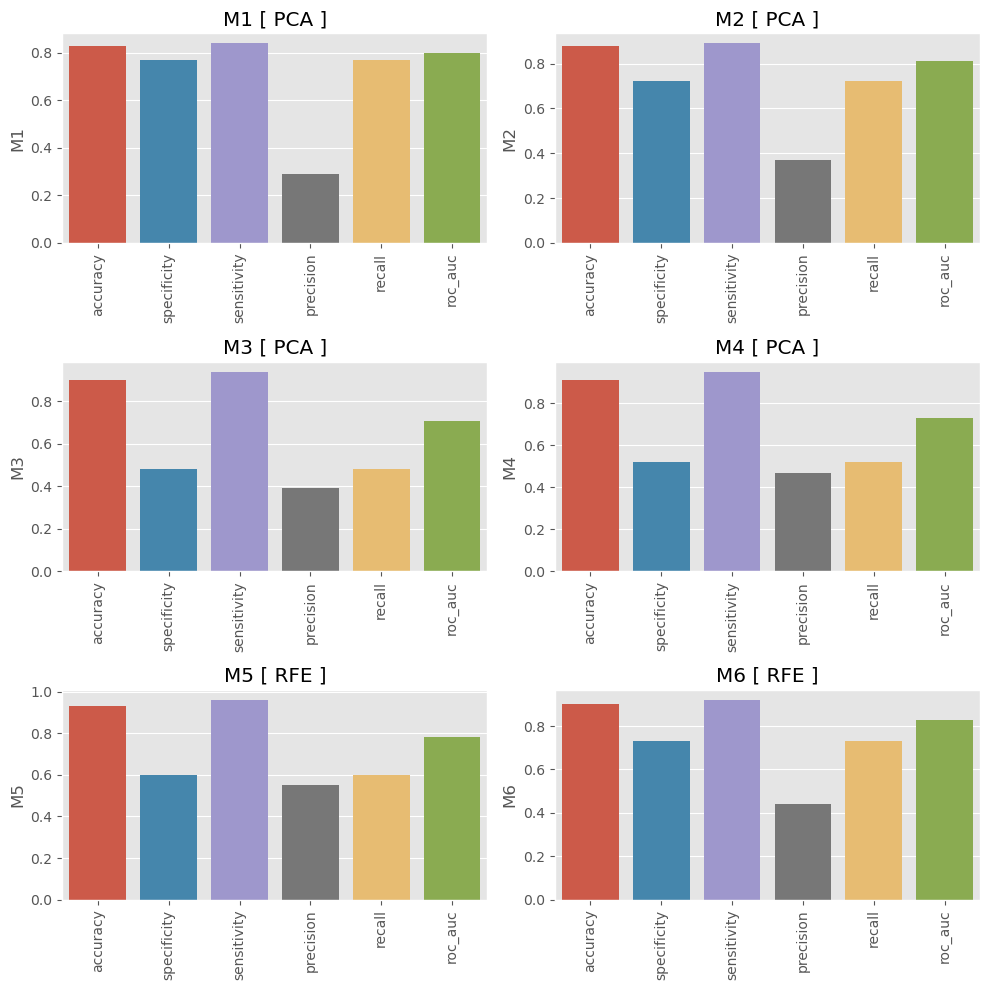

In [1874]:
n_cols = 2
n_rows = 3

plt.figure(figsize = [10,10])
for ind,model_id in enumerate(all_model_metrics.index):
    pos = ind+1 
    plt.subplot(n_rows,n_cols,pos)
    
    technique = all_model_metrics.loc[model_id]['technique']

    df = all_model_metrics.drop('technique',axis = 1)
    y = df.loc[model_id]
    x = df.columns
    title = model_id + ' [ '+technique +' ]'

    sns.barplot(x = x,y =y)
    plt.title(title)
    plt.xticks(rotation = 90)
plt.tight_layout()

### The Pick of the Models

**M6 is the pick of the models - Random Forest - with RFE - with Hyperparameter Tuning**

In [1880]:
interpretable_model =  best_estimator
interpretable_model

RandomForestClassifier(max_depth=16, max_features=12, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

### Ploting the Important Features

**User Defined function to plot the best features which are influencing the customer churn**

In [1877]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except ( ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

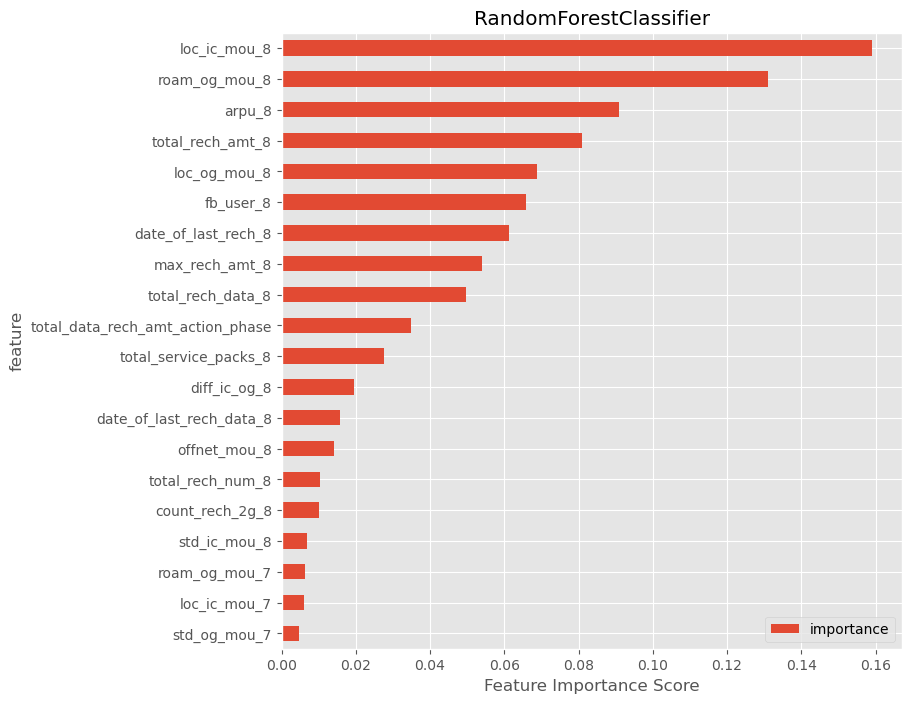

,importance
feature,
std_og_mou_7,0.004546
loc_ic_mou_7,0.005993
roam_og_mou_7,0.006320
std_ic_mou_8,0.006699
count_rech_2g_8,0.009994
total_rech_num_8,0.010355
offnet_mou_8,0.014186
date_of_last_rech_data_8,0.015688
diff_ic_og_8,0.019536


In [1878]:
plot_feature_importances(interpretable_model, 
                         X_train, y_train, top_n=20,title=interpretable_model.__class__.__name__)

**Above is the list of top 20 features with their scores which are important in predicting churn**

***End of the Notebook!!***